In [7]:
import pandas as pd 
transactions = pd.read_csv("./retail/transactions.csv" , parse_dates=["date"])
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


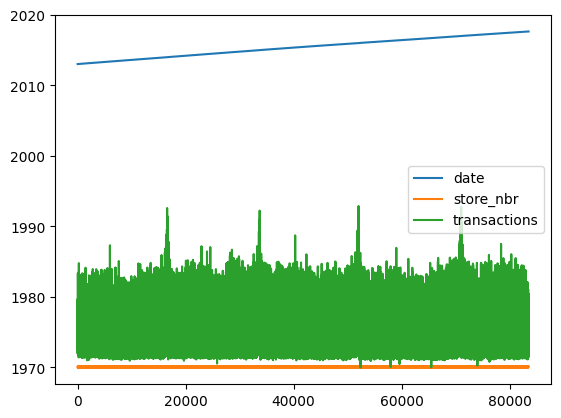

In [9]:
transactions.plot();

<Axes: xlabel='date'>

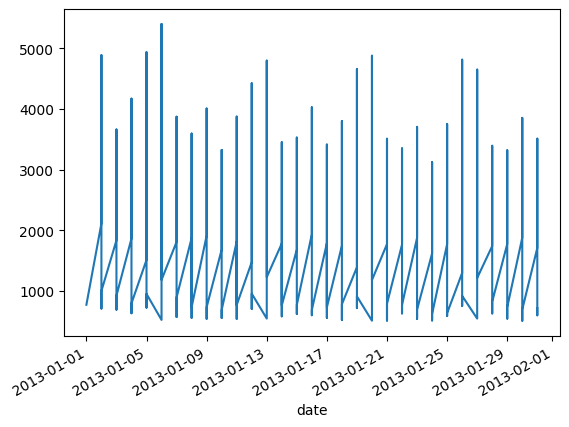

In [11]:
transactions.set_index("date").loc["2013-01","transactions"].plot()

<Axes: xlabel='date'>

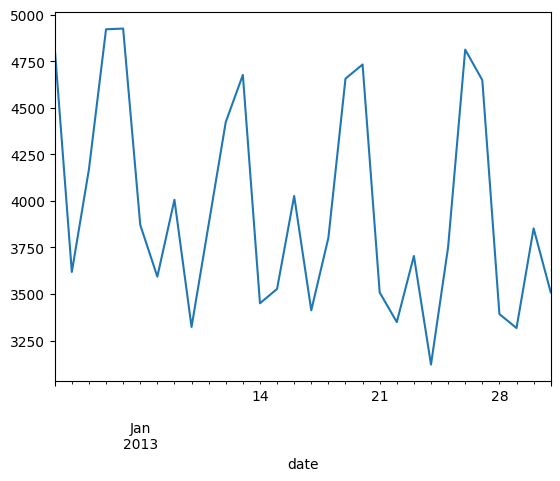

In [12]:
transactions.query("store_nbr == 44").set_index("date").loc["2013-01","transactions"].plot()

In [14]:
transactions_44 = transactions.loc[transactions["store_nbr"]==44,["date","transactions"]]
transactions_44.head()

,date,transactions
38,2013-01-02,4821
84,2013-01-03,3618
130,2013-01-04,4169
176,2013-01-05,4921
222,2013-01-06,4925


<Axes: xlabel='date'>

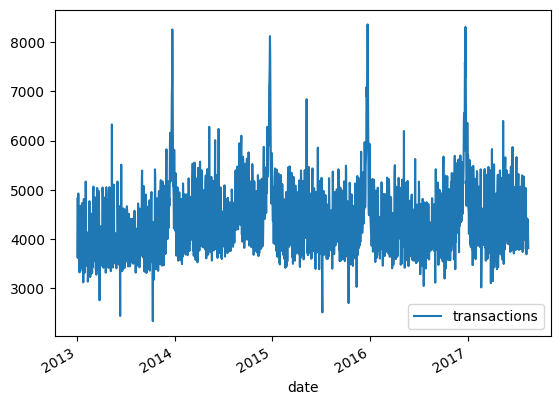

In [17]:
transactions_44.set_index("date").plot()

<Axes: xlabel='date'>

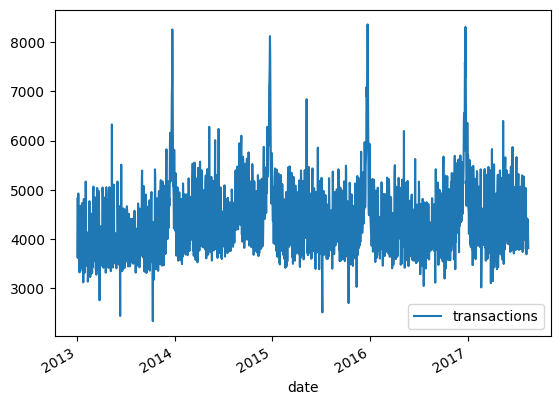

In [18]:
transactions_44.plot(x="date", y = "transactions")

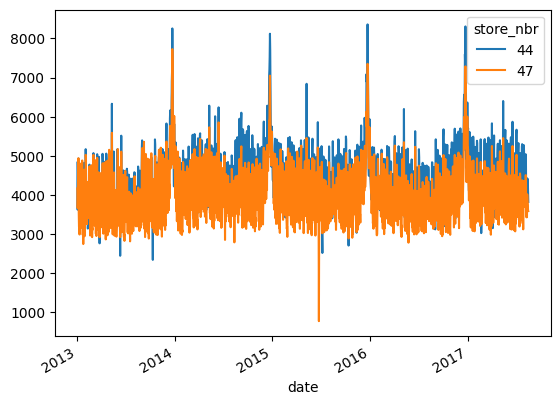

In [22]:
(
    transactions
    .query("store_nbr in [44,47]")
    .pivot_table(index="date", columns="store_nbr")
    .droplevel(0,axis=1)
    .plot()
);

### Exercise 1 
simple line chart

In [24]:
oil = pd.read_csv("./retail/oil.csv")

oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


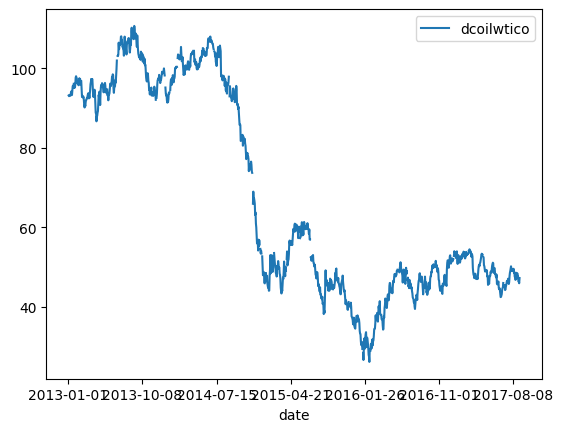

In [27]:
oil.set_index("date").plot();

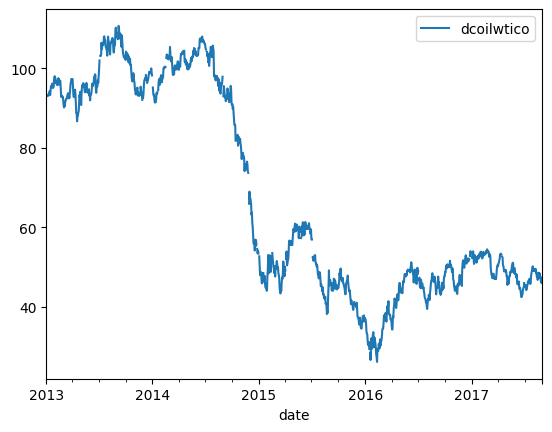

In [29]:
oil.astype({"date":"datetime64[ns]"}).plot(x="date");

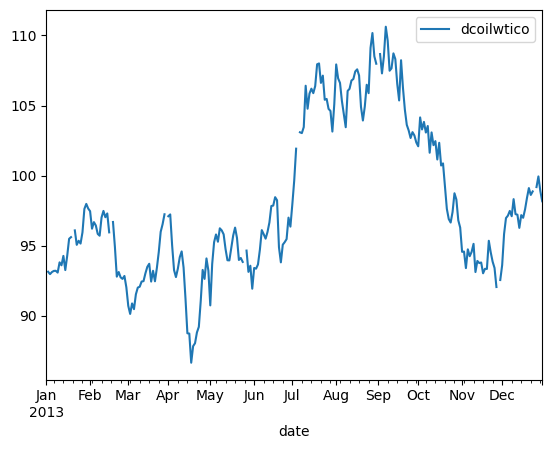

In [30]:
oil.astype({"date":"datetime64[ns]"}).set_index("date").loc["2013"].plot();

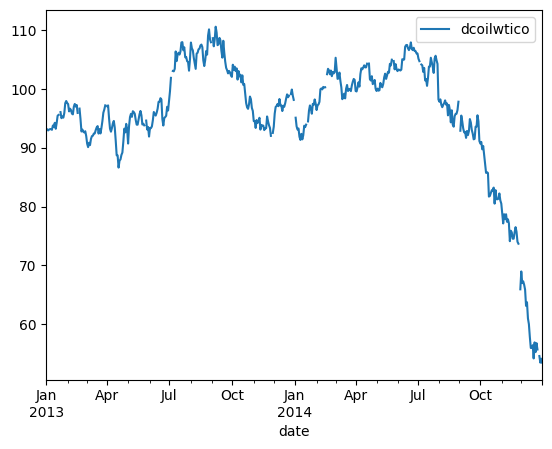

In [31]:
oil.astype({"date":"datetime64[ns]"}).set_index("date").loc["2013":"2014"].plot();

### formatting 

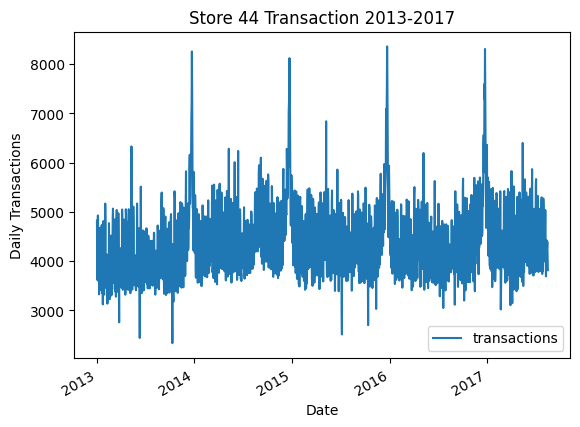

In [33]:
transactions_44.set_index('date').plot(
      title="Store 44 Transaction 2013-2017",
      xlabel='Date',
      ylabel="Daily Transactions"
   );

### colors